<a href="https://colab.research.google.com/github/Ashay-20/COLAB/blob/main/stocks_equity_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

In [2]:
df = pd.read_csv('/content/Equity Data (1 Jan 2020).csv')
df[' DATE1'] = pd.to_datetime(df[' DATE1'])
df["month"]=df[' DATE1'].dt.month
df["year"]=df[' DATE1'].dt.year
df["day of month"]=df[' DATE1'].dt.day
df['profit']= ((df[' OPEN_PRICE'] - df[' CLOSE_PRICE']) * df[' DELIV_QTY'])

In [3]:
df[(df.year==2022) & (df.month==1)].groupby(['SYMBOL']).sum().reset_index().sort_values(by=['profit']).tail(3)

,SYMBOL,PREV_CLOSE,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,LAST_PRICE,CLOSE_PRICE,AVG_PRICE,TTL_TRD_QNTY,TURNOVER_LACS,NO_OF_TRADES,DELIV_QTY,DELIV_PER,month,year,day of month,profit
1486,TCS,49927.20,50057.00,50456.50,49343.15,49904.90,49867.95,49877.63,48551584,1860738.12,3512261,30437629.0,800.53,13,26286,259,8.822467e+08
170,BAJFINANCE,96087.45,96275.40,97230.30,94139.05,95392.55,95327.55,95725.91,23168721,1699033.08,2140443,8420832.0,454.73,13,26286,259,9.797613e+08
1657,ZOMATO,1496.30,1498.15,1522.65,1431.05,1460.15,1458.60,1464.40,669964745,670792.69,2945185,279700772.0,626.95,13,26286,259,1.889358e+09


In [ ]:
# !pip install --upgrade matplotlib

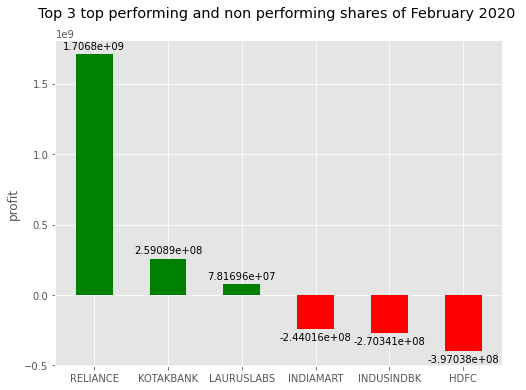

In [7]:

yr,mn=2020,2
def mtly_grph(yr,mn):
    plt.figure(figsize=(8,6))
    plt.style.use('ggplot')
    tt=(df[(df.year==yr) & (df.month==mn)].groupby(['SYMBOL']).sum().reset_index().sort_values(by=['profit'],ascending=False)[['SYMBOL',"profit"]].head(3)).append((df[(df.year==yr) & (df.month==mn)].groupby(['SYMBOL']).sum().reset_index().sort_values(by=['profit'],ascending=False)[['SYMBOL',"profit"]].tail(3)))
    color=["red" if i>=3 else "green" for i,_ in enumerate(tt['profit'])]
    plt.bar_label(plt.bar(tt["SYMBOL"],tt["profit"],width = 0.5,color=color),padding=3)
    plt.title(f"Top 3 top performing and non performing shares of {calendar.month_name[mn]} {yr} ",y=1.05)
    plt.ylabel('profit') 
    plt.show()
mtly_grph(yr,mn)

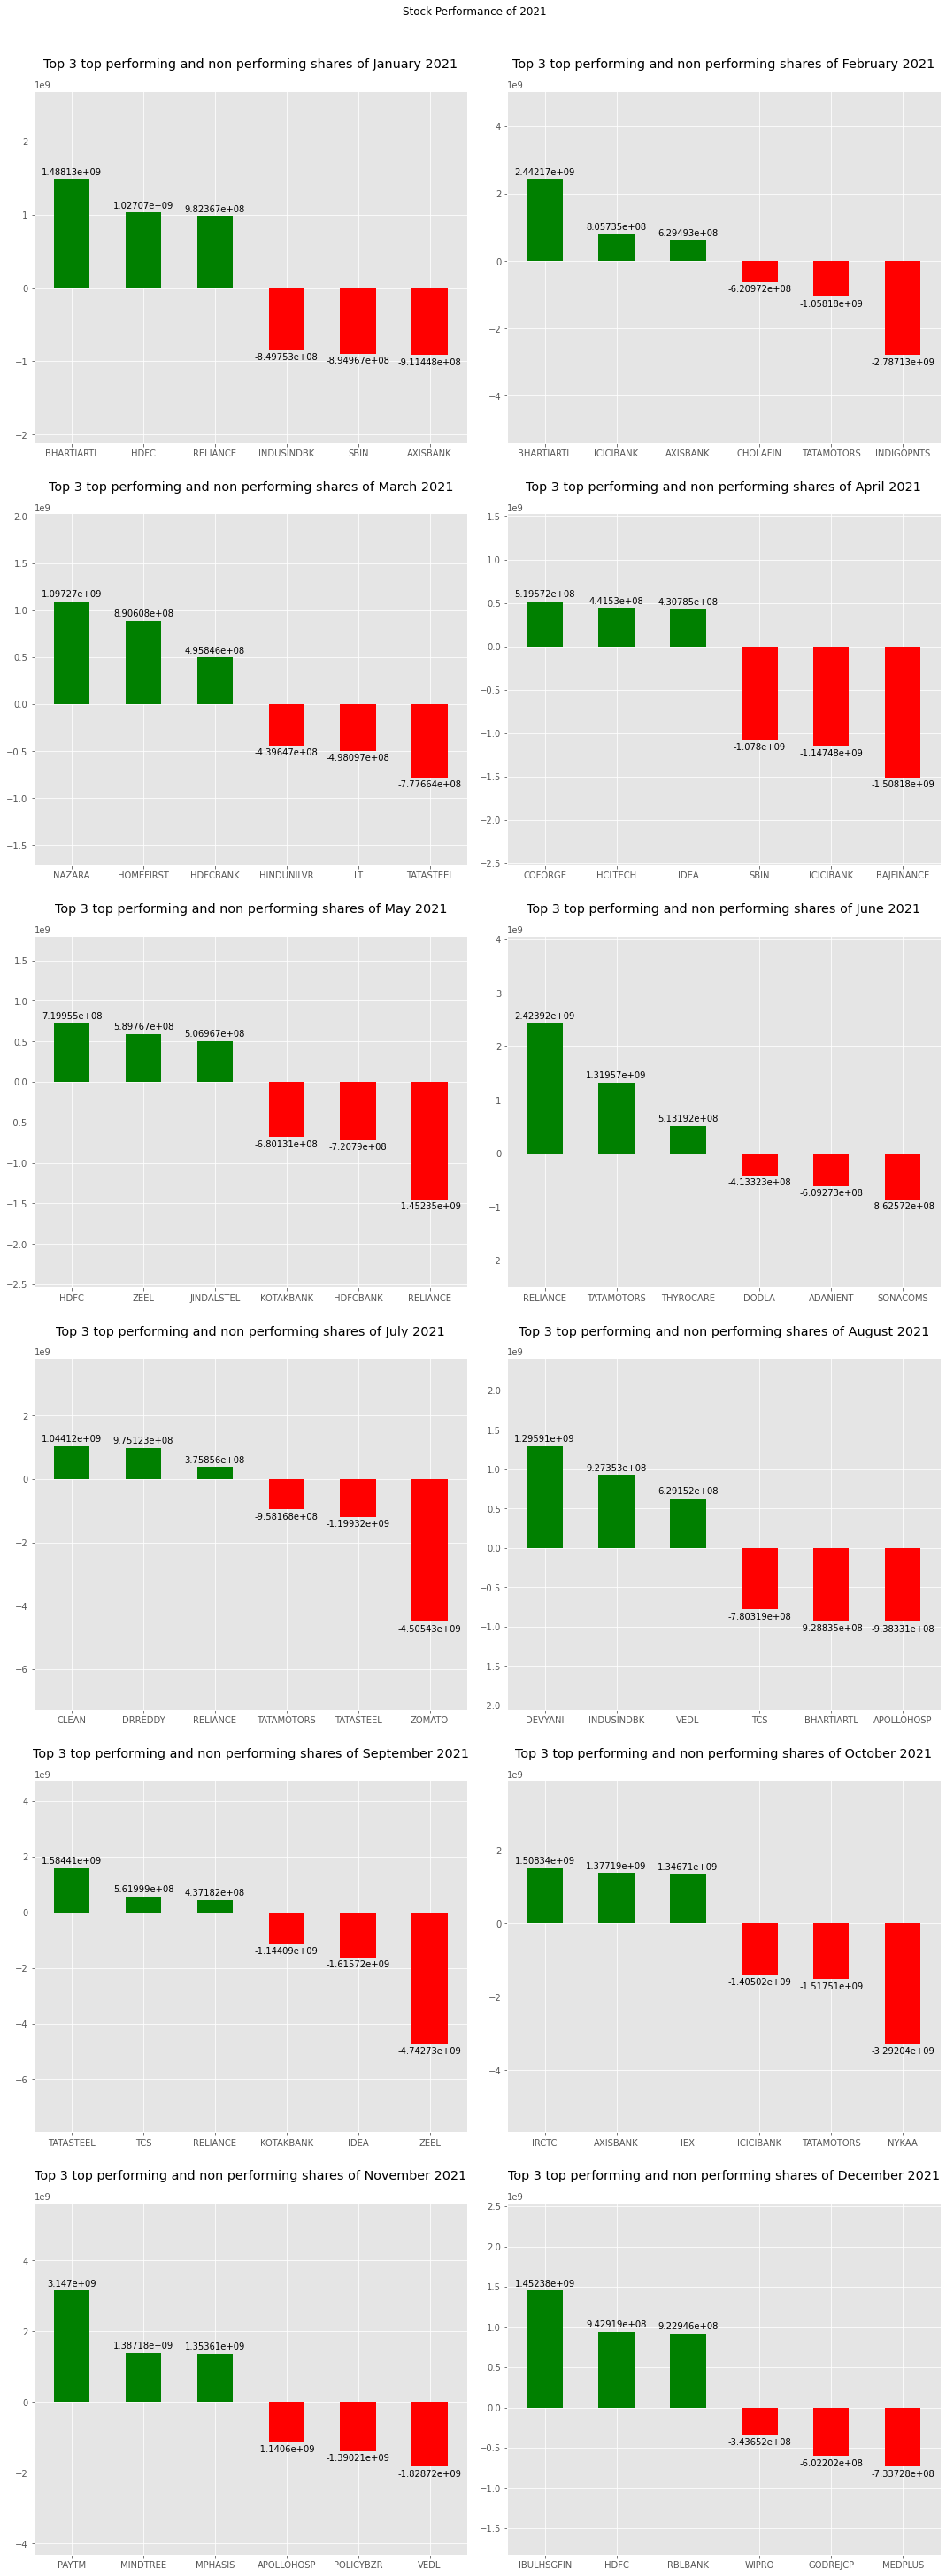

In [6]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 40))
yr=2021
for i in range(1,13):
    ax = plt.subplot(6, 2, i, ymargin=0.5)
    tt=(df[(df.year==yr) & (df.month==i)].groupby(['SYMBOL']).sum().reset_index().sort_values(by=['profit'],ascending=False)[['SYMBOL',"profit"]].head(3)).append((df[(df.year==yr) & (df.month==i)].groupby(['SYMBOL']).sum().reset_index().sort_values(by=['profit'],ascending=False)[['SYMBOL',"profit"]].tail(3)))
    color=["red" if i>=3 else "green" for i,_ in enumerate(tt['profit'])]
    ax.bar_label(plt.bar(tt["SYMBOL"],tt["profit"],width = 0.5,color=color),padding=3)
    ax.set_title(f"Top 3 top performing and non performing shares of {calendar.month_name[i]} {yr}",y=1.05)
plt.suptitle(f'Stock Performance of {yr}', y=1.01)
plt.tight_layout(h_pad=3.0)
plt.show()